In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random as ran

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

In [3]:
def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

In [4]:
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [5]:
x_train, y_train = TRAIN_SIZE(55000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)



41403
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


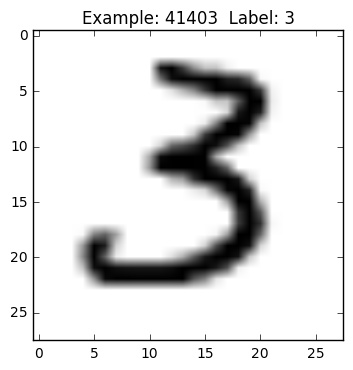

In [6]:
num = ran.randint(0, x_train.shape[0])
print (num)
display_digit(num)

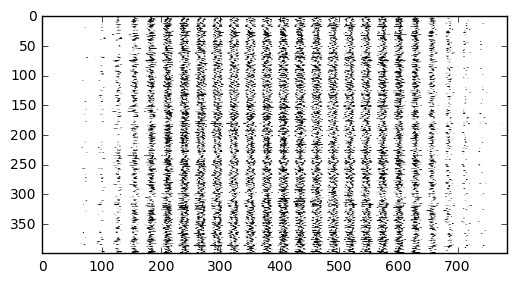

In [7]:
display_mult_flat(0,400)

In [8]:
import tensorflow as tf
sess = tf.Session()

In [9]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [10]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [11]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [12]:
print (y)

Tensor("Softmax:0", shape=(?, 10), dtype=float32)


In [13]:
x_train, y_train = TRAIN_SIZE(3)
sess.run(tf.global_variables_initializer())
#If using TensorFlow prior to 0.12 use:
#sess.run(tf.initialize_all_variables())
print(sess.run(y, feed_dict={x: x_train}))

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (3, 784)
y_train Examples Loaded = (3, 10)

[[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]


In [14]:
print (sess.run(tf.nn.softmax(tf.zeros([4]))))
print (sess.run(tf.nn.softmax(tf.constant([0.1, 0.005, 2]))))

[ 0.25  0.25  0.25  0.25]
[ 0.11634309  0.10579926  0.7778576 ]


In [15]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [16]:
j = [0.03, 0.03, 0.01, 0.9, 0.01, 0.01, 0.0025,0.0025, 0.0025, 0.0025]
k = [0,0,0,1,0,0,0,0,0,0]
-np.log(j)
-np.multiply(np.log(j),k)

array([ 0.        ,  0.        ,  0.        ,  0.10536052,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [17]:
k = [0,0,1,0,0,0,0,0,0,0]
-np.multiply(np.log(j),k)

array([ 0.        ,  0.        ,  4.60517019,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [18]:
x_train, y_train = TRAIN_SIZE(50000)
x_test, y_test = TEST_SIZE(10000)
LEARNING_RATE = 0.05
TRAIN_STEPS = 4000

sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (50000, 784)
y_train Examples Loaded = (50000, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)
Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [19]:
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + 
              '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))

Training Step:0  Accuracy =  0.6668  Loss = 2.24962
Training Step:100  Accuracy =  0.8517  Loss = 0.8059
Training Step:200  Accuracy =  0.8724  Loss = 0.61918
Training Step:300  Accuracy =  0.8814  Loss = 0.542647
Training Step:400  Accuracy =  0.8861  Loss = 0.499195
Training Step:500  Accuracy =  0.8907  Loss = 0.470461
Training Step:600  Accuracy =  0.8941  Loss = 0.449698
Training Step:700  Accuracy =  0.8974  Loss = 0.4338
Training Step:800  Accuracy =  0.8989  Loss = 0.421119
Training Step:900  Accuracy =  0.9002  Loss = 0.410696
Training Step:1000  Accuracy =  0.9019  Loss = 0.401926
Training Step:1100  Accuracy =  0.9036  Loss = 0.394411
Training Step:1200  Accuracy =  0.905  Loss = 0.387874
Training Step:1300  Accuracy =  0.9059  Loss = 0.382118
Training Step:1400  Accuracy =  0.9074  Loss = 0.376995
Training Step:1500  Accuracy =  0.9085  Loss = 0.372397
Training Step:1600  Accuracy =  0.909  Loss = 0.368239
Training Step:1700  Accuracy =  0.9094  Loss = 0.364452
Training Ste

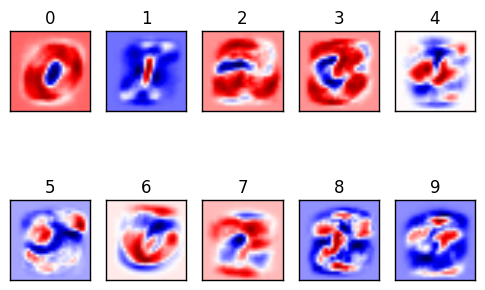

In [21]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False) 
plt.show()

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (1, 784)
y_train Examples Loaded = (1, 10)

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


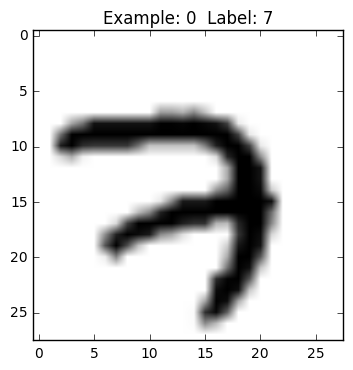

In [22]:
x_train, y_train = TRAIN_SIZE(1) 
display_digit(0)

In [23]:
answer = sess.run(y, feed_dict={x: x_train})
print(answer)

[[  4.06156214e-05   9.49545392e-06   2.80950516e-01   1.09887375e-02
    1.31613505e-03   1.75380173e-05   1.11383903e-04   6.80450380e-01
    8.72502290e-03   1.73902027e-02]]


In [24]:
answer.argmax()

7

In [25]:
def display_compare(num):
    # THIS WILL LOAD ONE TRAINING EXAMPLE
    x_train = mnist.train.images[num,:].reshape(1,784)
    y_train = mnist.train.labels[num,:]
    
    # THIS GETS OUR LABEL AS A INTEGER
    label = y_train.argmax()
    
    # THIS GETS OUR PREDICATION AS A INTEGER
    prediction = sess.run(y, feed_dict={x: x_train}).argmax() 
    
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()    

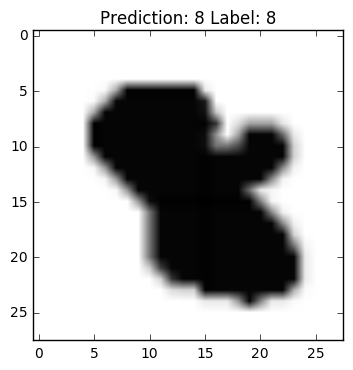

In [26]:
display_compare(ran.randint(0, 55000))